In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### data = dados não tratados
#### data0 = dados sem valores nulos
#### data1 = apenas dados numéricos

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
data0 = data.dropna() #dados sem nulos

In [4]:
data0['Engine Cylinders'] = data0.iloc[:,5].astype(int) # parâmetros da função: iloc[qtd de linhas, posição da coluna]
data0['Number of Doors'] = data0.iloc[:, 8].astype(int)

<ipython-input-4-1443a96fbc7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['Engine Cylinders'] = data0.iloc[:,5].astype(int) # parâmetros da função: iloc[qtd de linhas, posição da coluna]
<ipython-input-4-1443a96fbc7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['Number of Doors'] = data0.iloc[:, 8].astype(int)


In [5]:
data0.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data0['Car'] = (data0['Make'] + ' ' + data0['Model'])
data0.drop(['Make', 'Model'], axis=1, inplace=True)

<ipython-input-6-11a9d2e1163b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['Car'] = (data0['Make'] + ' ' + data0['Model'])
<ipython-input-6-11a9d2e1163b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0.drop(['Make', 'Model'], axis=1, inplace=True)


In [7]:
data0 = data0[['Car', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP']]
data0.head()

,Car,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW 1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW 1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW 1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW 1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW 1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


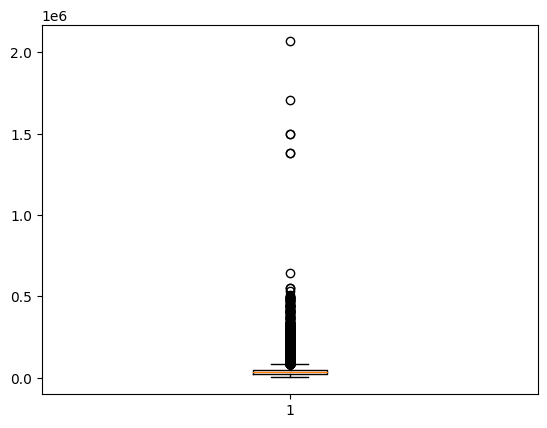

In [8]:
plt.boxplot(data0['MSRP'])
plt.show()

In [9]:
data0['MSRP'].describe().round(2)

,MSRP
count,8084.00
mean,50072.67
std,70293.13
min,2000.00
25%,25918.75
50%,35005.00
75%,48722.50
max,2065902.00


In [10]:
a = data0[60000 > data0['MSRP']] # seleciona valores menores que 6k

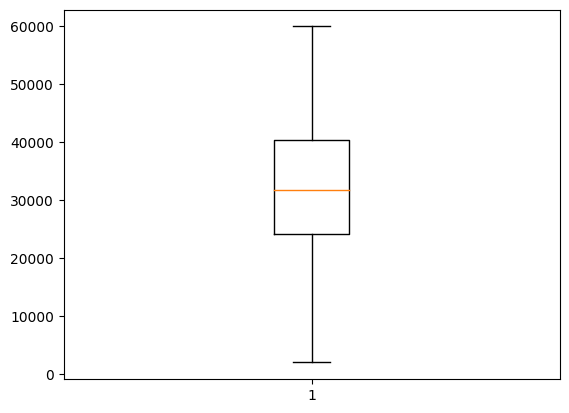

In [11]:
plt.boxplot(a['MSRP'])
plt.show()

In [12]:
a['MSRP'].describe().round(2)

,MSRP
count,6711.00
mean,31302.73
std,13514.96
min,2000.00
25%,24200.00
50%,31749.00
75%,40300.00
max,59955.00


In [13]:
data1 = data0[['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']]
data1.head(3)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6,2,26,19,3916,46135
1,2011,300.0,6,2,28,19,3916,40650
2,2011,300.0,6,2,28,20,3916,36350


### Matriz de correlação | PCA | K-Means

In [14]:
fig = px.imshow(data1.corr(), text_auto=True)
fig.show()

In [15]:
SEED = 12345
np.random.seed(SEED)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [16]:
data1_embedding_pca = pca_pipeline.fit_transform(data1)
projection = pd.DataFrame(columns=['x', 'y'], data=data1_embedding_pca)

In [17]:
projection.head(2)

,x,y
0,-0.585254,0.161046
1,-0.302880,0.121462


In [18]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)
kmeans_pca.fit(projection)
data1['cluster_pca'] = kmeans_pca.predict(projection) # define a "localização" do cluster de cada linha do dataset
projection['cluster_pca'] = kmeans_pca.predict(projection)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 15141.696551517509.
Iteration 1, inertia 12406.803607743603.
Iteration 2, inertia 12067.320610044291.
Iteration 3, inertia 11978.683509492563.
Iteration 4, inertia 11886.73128401485.
Iteration 5, inertia 11813.490985531618.
Iteration 6, inertia 11728.679227248966.
Iteration 7, inertia 11648.522121218151.
Iteration 8, inertia 11609.754098654685.
Iteration 9, inertia 11602.055404793577.
Iteration 10, inertia 11600.425242769772.
Iteration 11, inertia 11599.88718763583.
Converged at iteration 11: center shift 0.00014676302822040085 within tolerance 0.00023736634438564807.
Initialization complete
Iteration 0, inertia 12707.12846330269.
Iteration 1, inertia 10276.656561667785.
Iteration 2, inertia 9944.463478761081.
Iteration 3, inertia 9902.60492615448.
Iteration 4, inertia 9894.64734852062.
Iteration 5, inertia 9892.984246972734.
Converged at iteration 5: center shift 6.443526641303672e-05 within tolerance 0.00023736634438564807.
Initialization 

<ipython-input-18-ec7db19ac7ef>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
projection.head(2)

,x,y,cluster_pca
0,-0.585254,0.161046,0
1,-0.302880,0.121462,0


In [20]:
projection = projection.merge(data0[['Car', 'Year']], left_index=True, right_index=True)
projection.head(2)

,x,y,cluster_pca,Car,Year
0,-0.585254,0.161046,0,BMW 1 Series M,2011
1,-0.302880,0.121462,0,BMW 1 Series,2011


In [21]:
fig = px.scatter(
    projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'Car', 'Year'])
fig.show()

In [22]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.5934158609641192

In [23]:
pca_pipeline[1].explained_variance_.sum()

4.74791421010411